In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [4]:
def f(size):
    x = np.linspace(0,5,size) #0부터5사이의 size수 만큼 
    y = x * np.sin(x**2)+1
    return (x,y)

def sample(size):
    x = np.linspace(0,5,size)
    y = x * np.sin(x**2)+1+np.random.randn(x.size)*0.5
    return (x,y)

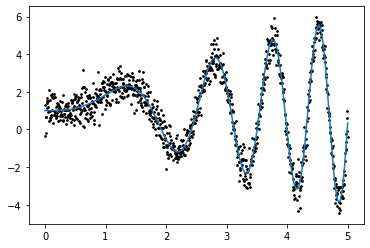

In [7]:
f_x , f_y = f(1000)
plt.plot(f_x,f_y)
X,y = sample(1000)
plt.scatter(X,y,s=3,c='black')

In [8]:
X.shape, y.shape

((1000,), (1000,))

In [11]:
X = X.reshape(-1,1)
y = y.reshape(-1,1)

In [13]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

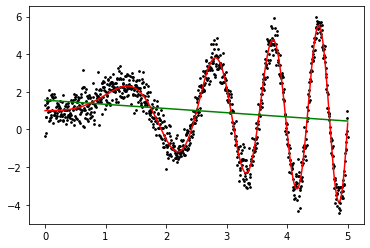

In [17]:
plt.plot(f_x,f_y,c="red")
plt.scatter(X.flatten(),y.flatten(),s=3,c="black")
plt.plot(X.flatten(),lr.predict(X).flatten(),c="green")

In [22]:
from sklearn.preprocessing import PolynomialFeatures

poly_features = PolynomialFeatures(degree=2)
X_poly = poly_features.fit_transform(X)
X_poly[:10]

array([[1.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [1.00000000e+00, 5.00500501e-03, 2.50500751e-05],
       [1.00000000e+00, 1.00100100e-02, 1.00200300e-04],
       [1.00000000e+00, 1.50150150e-02, 2.25450676e-04],
       [1.00000000e+00, 2.00200200e-02, 4.00801202e-04],
       [1.00000000e+00, 2.50250250e-02, 6.26251878e-04],
       [1.00000000e+00, 3.00300300e-02, 9.01802704e-04],
       [1.00000000e+00, 3.50350350e-02, 1.22745368e-03],
       [1.00000000e+00, 4.00400400e-02, 1.60320481e-03],
       [1.00000000e+00, 4.50450450e-02, 2.02905608e-03]])

In [23]:
lr = LinearRegression()
lr.fit(X_poly,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

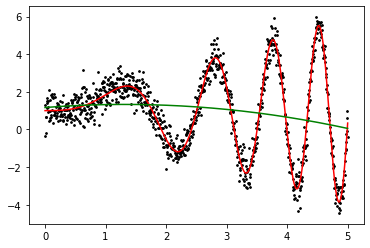

In [25]:
plt.plot(f_x,f_y,c="red")
plt.scatter(X.flatten(),y.flatten(),s=3,c="black")
plt.plot(X.flatten(),lr.predict(X_poly).flatten(),c="green")

In [29]:
poly_features = PolynomialFeatures(degree=9)
X_poly = poly_features.fit_transform(X)
X_poly[:3]

array([[1.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00],
       [1.00000000e+00, 5.00500501e-03, 2.50500751e-05, 1.25375751e-07,
        6.27506263e-10, 3.14067198e-12, 1.57190790e-14, 7.86740691e-17,
        3.93764110e-19, 1.97079134e-21],
       [1.00000000e+00, 1.00100100e-02, 1.00200300e-04, 1.00300601e-06,
        1.00401002e-08, 1.00501504e-10, 1.00602106e-12, 1.00702808e-14,
        1.00803612e-16, 1.00904517e-18]])

In [30]:
lr = LinearRegression()
lr.fit(X_poly,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

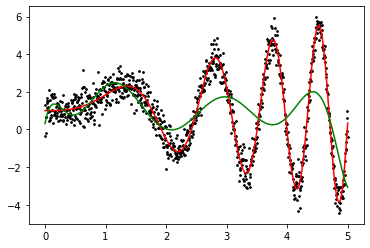

In [31]:
plt.plot(f_x,f_y,c="red")
plt.scatter(X.flatten(),y.flatten(),s=3,c="black")
plt.plot(X.flatten(),lr.predict(X_poly).flatten(),c="green")

In [32]:
def rmse(predictions, targets):
    return np.sqrt(((predictions-targets)**2).mean())

In [36]:
poly_range = list(range(10,50))
rmse_lr_list = []
rmse_lasso_list = []
rmse_ridge_list = []

from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge

for poly_value in poly_range:
    poly_features = PolynomialFeatures(degree=poly_value)
    X_poly = poly_features.fit_transform(X)
    lr = LinearRegression()
    lr.fit(X_poly,y)
    
    rmse_lr_list.append(rmse(lr.predict(X_poly),y))
    
    lasso = Lasso(fit_intercept=False)
    lasso.fit(X_poly,y)
    rmse_lasso_list.append(rmse(lasso.predict(X_poly),y))
    
    ridge = Ridge()
    ridge.fit(X_poly,y)
    rmse_ridge_list.append(rmse(ridge.predict(X_poly),y))

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2385.2650650340015, tolerance: 0.5430495409198353
  positive)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2391.518043094171, tolerance: 0.5430495409198353
  positive)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=9.00523e-18): result may not be accurate.
  overwrite_a=True).T
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2388.6143685132793, tolerance: 0.5430495409198353
  positive)
C:\ProgramDat

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2295.7815389894804, tolerance: 0.5430495409198353
  positive)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2287.1304848134328, tolerance: 0.5430495409198353
  positive)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2278.4753805091195, tolerance: 0.5430495409198353
  positive)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality

In [39]:
import pandas as pd
from pandas import DataFrame

data = {"poly_range":poly_range, "lr_rmse":rmse_lr_list, "lasso_rmse":rmse_lasso_list,"ridge_rmse":rmse_ridge_list}

df = DataFrame(data).set_index("poly_range")
df

,lr_rmse,lasso_rmse,ridge_rmse
poly_range,,,
10,1.884882,2.286746,1.911782
11,1.874544,2.287819,1.892208
12,1.618323,2.288039,1.891266
13,1.338678,2.287350,1.864130
14,1.319870,2.286101,1.699170
15,0.934674,2.284696,1.444568
16,0.739206,2.283397,1.477569
17,0.703253,2.282329,1.281094
18,0.722100,2.281539,0.887375


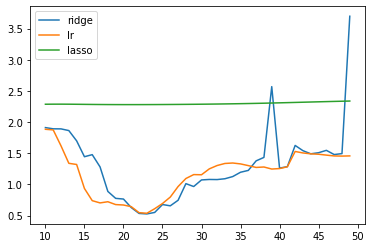

In [43]:
plt.plot(poly_range, df["ridge_rmse"],label="ridge")
plt.plot(poly_range, df["lr_rmse"],label="lr")
plt.plot(poly_range, df["lasso_rmse"],label="lasso")
plt.legend()

In [44]:
df.min()

lr_rmse       0.537244
lasso_rmse    2.280640
ridge_rmse    0.526596
dtype: float64

In [45]:
df["ridge_rmse"].sort_values().head()

poly_range
23    0.526596
22    0.534242
24    0.550263
21    0.628304
26    0.656500
Name: ridge_rmse, dtype: float64

In [51]:
poly_features = PolynomialFeatures(degree=23)
X_poly = poly_features.fit_transform(X)
ridge = Ridge(fit_intercept=False)
ridge.fit(X_poly,y)

Ridge(alpha=1.0, copy_X=True, fit_intercept=False, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

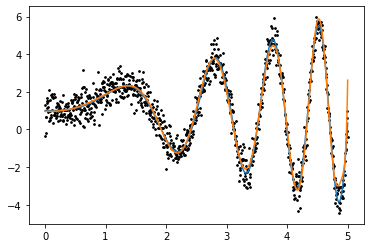

In [52]:
plt.plot(f_x,f_y)
plt.scatter(X.flatten(),y.flatten(),s=3,c="black")
plt.plot(X.flatten(),ridge.predict(X_poly).flatten())